In [1]:
# import packages for working directory
import os 
import pandas as pd 
import geopandas as gpd
import requests
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

/Users/Tra_FIT/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [2]:
# Set colour template with the index as the goal number, where 0 corredpond to the UN Blue
SDG_col = ['#009EDB','#E5243B',
 '#DDA63A',
 '#4C9F38',
 '#C5192D',
 '#FF3A21',
 '#26BDE2',
 '#FCC30B',
 '#A21942',
 '#FD6925',
 '#DD1367',
 '#FD9D24',
 '#BF8B2E',
 '#3F7E44',
 '#0A97D9',
 '#56C02B',
 '#00689D',
 '#19486A']

plt.rcParams['font.family'] = 'roboto'
plt.rcParams['figure.facecolor'] = '#FBFBFB'
plt.rcParams['font.size'] = '8'

plt.rcParams['xtick.major.pad'] = 10
plt.rcParams['xtick.major.size'] = 0

plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

plt.rcParams['legend.framealpha'] = 0

In [3]:
regiona_m49_mapping = {'001':'World',
                        '202':'Sub-Saharan Africa',
                        '419':'Latin America and the Caribbean',
                        #'005':'South America',
                        '009':'Oceania',
                        '015' :'Northern Africa'
                        #'Western Asia',
                        #'Central and Southern Asia',
                        #'Eastern and South-Eastern Asia','
                        #'Europe and Northern America'
                        }

In [4]:
loc_dir = '/Users/Tra_FIT/Library/CloudStorage/OneDrive-UnitedNations/'
file_dir = '{}SDG Report 2022/8. Media & Communication/13_Regional Launches/Data fact sheet/'.format(loc_dir)

### 1. SDG Database exploration

In [5]:
url = 'https://unstats.un.org/sdgs/UNSDGAPIV5/v1/sdg/Series/List'
res = requests.get(url)
df = pd.json_normalize(res.json())

In [7]:
# print the seriesCode(s) when passed in the indicator as string
def return_seriesCode(indicator:str):
    boolean = []
    for indicators in  Series_list['indicator']:
        if indicator in indicators:
            boolean.append(True)
        else:
            boolean.append(False)
    if sum(boolean) == 0:
        print('There is no measure for this indicator')
    
    else:
        print('There exist {} measure(s) for this indicators'.format(sum(boolean)))
    
        for code, des in zip(Series_list.loc[boolean,'code'],Series_list.loc[boolean,'description']):
            print(code, ':',des)

# return pandas dataframe when passed in indicator and the geoAreaCode (M49)
def return_datapoints(seriesCode: str, geoAreaCode:str):

    uri = '/v1/sdg/Series/{seriesCode}/GeoArea/{geoAreaCode}/DataSlice'.format(seriesCode = seriesCode,geoAreaCode= geoAreaCode)

    res = requests.get("https://unstats.un.org/sdgs/UNSDGAPIV5{}".format(uri))
    res = res.json()

    data = res.pop('dimensions')
    metadata = res

    df = pd.json_normalize(data) # need to slice down to dimention to ignore the metadata

    df['value'] = df['value'].astype('float')
    
    df.rename(columns = {'timePeriodStart':'Year'}, inplace = True)
    df['Year'] = df['Year'].astype('int')
    df.sort_values('Year', inplace = True)
    df_post2010 = df[df['Year']>=2010]

    # Refining df 'sex' column if exists
    if 'Sex' in df.columns:
        df_post2010.replace({'MALE':'Male','FEMALE' : 'Female','BOTHSEX':'All'}, inplace = True)

    
    if len(df) == 0:
        print('There is no data point available for this country or area on {}.'.format(seriesCode))
    else:
        print('The year available: {}\n There exists {} data points for {}.'.format(df['Year'].unique(),len(df),seriesCode))
        

    return df_post2010, metadata

In [8]:
# test run
#return_seriesCode('1.1.1')

### 2. Sub-Saharan Africa
https://unitednations-my.sharepoint.com/:w:/r/personal/min3_un_org/Documents/Y_SDG%20shared/SDG%20Reports/2022/8.%20Media%20%26%20Communication/13_Regional%20Launches/SDG%20Report%202022%20Fact%20Sheet_%20Africa%20rev.docx?d=w4988ec997c45489b844469bb1a5f1e0a&csf=1&web=1&e=PUtWbF

In [9]:
geoAreaCode = '202' # sub-saharan africa # africa: '002'

# poverty data
G1_data , G1_meta_data = return_datapoints(seriesCode = 'SI_POV_DAY1',geoAreaCode= geoAreaCode)

# not sure about the hunger data
G2_data , G2_meta_data = return_datapoints(seriesCode = 'SH_STA_STNTN',geoAreaCode= geoAreaCode)

# health: child mortality
G3_2_data , G3_2_meta_data = return_datapoints(seriesCode = 'SH_DYN_MORT',geoAreaCode= geoAreaCode)

# health: skilled birth attendance (only 2004, 2011, 2021 datapoints)
G3_1_data , G3_1_meta_data = return_datapoints(seriesCode = 'SH_STA_BRTC',geoAreaCode= geoAreaCode)

# health: new HIV incidence
G3_3_1_data , G3_3_1_meta_data = return_datapoints(seriesCode = 'SH_HIV_INCD',geoAreaCode= geoAreaCode)

# health: malaria (only indicator available on the api call, not consistent with the factsheet)
G3_3_3_data , G3_3_3_meta_data = return_datapoints(seriesCode = 'SH_STA_MALR',geoAreaCode= geoAreaCode)

# education: data points up to 2019 only, filter 'Sex' for 'BOTHSEX'
G4_c_1_data , G4_c_1_meta_data = return_datapoints(seriesCode = 'SE_TRA_GRDL',geoAreaCode= geoAreaCode)

# gender equality (only 1 data point)
G5_6_1_data , G5_6_1_meta_data = return_datapoints(seriesCode = 'SH_FPL_INFM',geoAreaCode= geoAreaCode)

# gender equality: early mariage (only every 5 years)
G5_3_1_data , G5_3_1_meta_data = return_datapoints(seriesCode = 'SP_DYN_MRBF18',geoAreaCode= geoAreaCode)

# energy: location filter on 'ALLAREA'
G7_1_1_data , G7_1_1_meta_data = return_datapoints(seriesCode = 'EG_ACS_ELEC',geoAreaCode= geoAreaCode)

# child labour (only 3 data points all in 2020, disaggregated by sex)
# secondary indicator 'SL_TLF_CHLDEA' yield no data point
G8_7_1_data , G8_7_1_meta_data = return_datapoints(seriesCode = 'SL_TLF_CHLDEC',geoAreaCode= geoAreaCode)

# Manufacturing: data point up to 2019
G9_b_1_data , G9_b_1_meta_data = return_datapoints(seriesCode = 'NV_IND_TECH',geoAreaCode= geoAreaCode)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

### 3. Data Exploration

#### 3.1 Poverty Data
Proportion of population below international poverty line (%) [SI_POV_DAY1]

In [9]:
G1_data.set_index('Year', inplace = True)

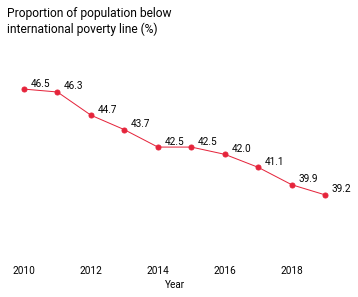

In [10]:
G1_plot = G1_data.plot.line(legend = False, 
                            marker = '.',markersize = 10, 
                            linewidth = 1, color = SDG_col[1])

# set title                        
G1_plot.set_title('Proportion of population below \ninternational poverty line (%)', loc='left')

# turning off spine.spines['right'].set_visible(False)
G1_plot.spines['top'].set_visible(False)
G1_plot.spines['right'].set_visible(False)
G1_plot.spines['bottom'].set_visible(False)
G1_plot.spines['left'].set_visible(False)
G1_plot.get_yaxis().set_visible(False)

# setting axis limit
G1_plot.set_ylim(35,50)
G1_plot.set_xlim(2009.5,2019.5)

#G1_plot.tick_params(axis='x', which='major', length=0, pad = 10)


for key, value in G1_data.iterrows():
    G1_plot.annotate(value['value'],(key+0.2,value['value']+0.2))



#### 3.2 Hunger Data

In [11]:
G2_data.set_index('Year', inplace = True)
G2_data

,value,Age,Reporting Type
Year,,,
2010,53806.2,<5Y,G
2011,54137.3,<5Y,G
2012,54341.8,<5Y,G
2013,54467.1,<5Y,G
2014,54576.2,<5Y,G
2015,54749.9,<5Y,G
2016,55008.5,<5Y,G
2017,55195.9,<5Y,G
2018,55273.8,<5Y,G


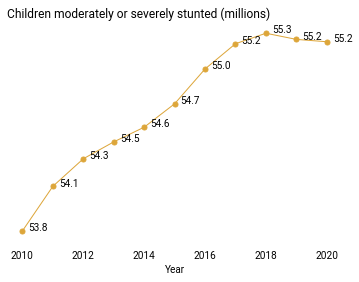

In [12]:
G2_plot = G2_data.plot.line(legend = False, 
                            marker = '.',markersize = 10, 
                            linewidth = 1, color = SDG_col[2])

# set title                        
G2_plot.set_title('Children moderately or severely stunted (millions)', loc='left')

# turning off spine.spines['right'].set_visible(False)
G2_plot.spines['top'].set_visible(False)
G2_plot.spines['right'].set_visible(False)
G2_plot.spines['bottom'].set_visible(False)
G2_plot.spines['left'].set_visible(False)
G2_plot.get_yaxis().set_visible(False)

# setting axis limit
#G2_plot.set_ylim(53000,56000)
G2_plot.set_xlim(2009.5,2020.5)

#G1_plot.tick_params(axis='x', which='major', length=0, pad = 10)


for key, value in G2_data.iterrows():
    G2_plot.annotate('{:.1f}'.format(value['value']/1000),(key+0.2,value['value']+0.2))

#### 3.3 Health data

##### 3.3.1 Skilled Birth Attendance

In [13]:
G3_1_meta_data # Proportion of births attended by skilled health personnel (%)
G3_1_data.head()


,value,Year,Reporting Type
1,51.87976,2011,G
2,64.33712,2021,G


(-1.25, 1.25, -1.25, 1.25)

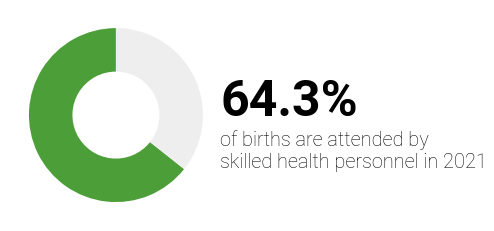

In [14]:
fig, ax = plt.subplots()
value = G3_1_data['value'][2]
ax.pie( [value,(100 - value)],
        wedgeprops=dict(width=.5), # donut
        startangle= 90,
        colors = [SDG_col[3],'#EEEEEE'])

ax.annotate('{:.1f}%'.format(value), (1.2,0), fontsize= 50,fontweight = 'bold')
ax.annotate('of births are attended by \nskilled health personnel in 2021', (1.2,-0.6), fontsize= 20,fontname = 'roboto',fontweight ='light')

ax.axis('on')

##### 3.3.2 Child mortality

In [15]:
G3_2_data_pivot = G3_2_data.pivot(index = 'Year',columns = 'Sex', values= 'value')

Text(0.5, 1.0, 'Child Mortality')

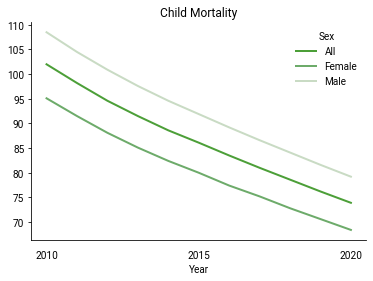

In [16]:
ax = G3_2_data_pivot.plot.line(linewidth = 2,color = [SDG_col[3],'#6dab6a','#c9dbc4'])

# turning off spine.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# xticks labels
ax.xaxis.set_ticks(np.arange(2010, 2021, 5))
ax.set_title('Child Mortality')

##### 3.3.3 Number of new HIV infections per 1,000 uninfected population, by sex and age (per 1,000 uninfected population)

In [17]:
G3_3_1_data_allage = G3_3_1_data[G3_3_1_data['Age']=='ALLAGE']
G3_3_1_data_allage = G3_3_1_data_allage.pivot(index = 'Year',columns = 'Sex',values = 'value')

In [18]:
G3_3_1_data_allage

Sex,All,Female,Male
Year,,,
2010,1.90,2.18,1.62
2011,1.76,2.05,1.47
2012,1.63,1.92,1.35
2013,1.51,1.79,1.22
2014,1.39,1.67,1.12
2015,1.29,1.56,1.02
2016,1.20,1.47,0.94
2017,1.11,1.37,0.86
2018,1.01,1.26,0.77


Text(0.5, 1.0, 'New HIV Incidence Rate')

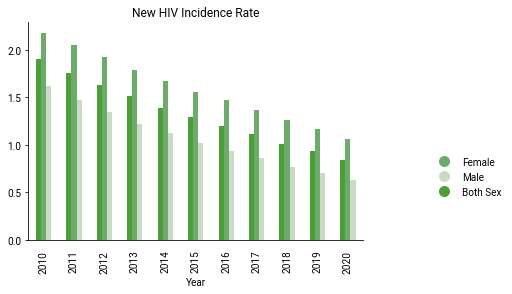

In [19]:
ax = G3_3_1_data_allage.plot.bar(linewidth = 2, color = [SDG_col[3],'#6dab6a','#c9dbc4']
                            )
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
legend_elements = [Line2D([0], [0], marker='o', markersize = 10,linewidth=0,  color='#6dab6a', label='Female'),
                    Line2D([0], [0], marker='o', markersize = 10,linewidth=0, color='#c9dbc4', label='Male' ),
                    Line2D([0], [0], marker='o', markersize = 10,linewidth=0, color=SDG_col[3], label='Both Sex')]

ax.legend(handles = legend_elements, bbox_to_anchor = (1.2,0.4), borderaxespad=0.)
ax.set_title('New HIV Incidence Rate')

Text(0.5, 1.0, 'New HIV Incidence Rate')

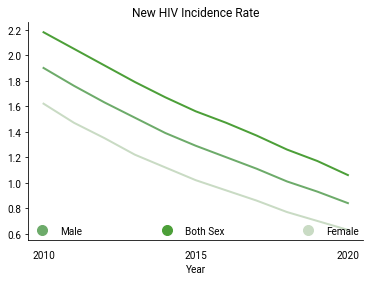

In [20]:
ax = G3_3_1_data_allage.plot.line(linewidth = 2, color = ['#6dab6a',SDG_col[3],'#c9dbc4']
                            )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks(np.arange(2010, 2021, 5))


legend_elements = [Line2D([0], [0], marker='o', markersize = 10,linewidth=0,  color='#6dab6a', label='Male'),
                    Line2D([0], [0], marker='o', markersize = 10,linewidth=0,  color=SDG_col[3], label='Both Sex'),
                    Line2D([0], [0], marker='o', markersize = 10,linewidth=0, color='#c9dbc4', label='Female')]

ax.legend(handles = legend_elements, loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.)
ax.set_title('New HIV Incidence Rate')

##### 3.3.4 Malaria incidence per 1,000 population at risk (per 1,000 population) [SH_STA_MALR] 

In [21]:
G3_3_3_data.set_index('Year', inplace =True)

Text(0.5, 1.0, 'New HIV Incidence Rate')

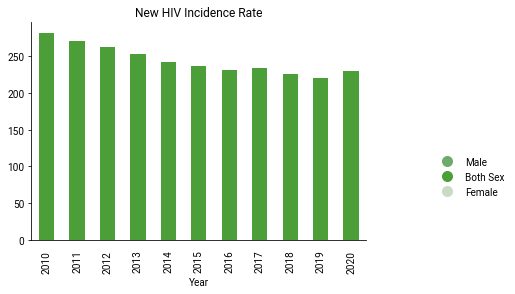

In [22]:
ax = G3_3_3_data.plot.bar(color = SDG_col[3])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.legend(handles = legend_elements, bbox_to_anchor = (1.2,0.4), borderaxespad=0.)
ax.set_title('New HIV Incidence Rate')

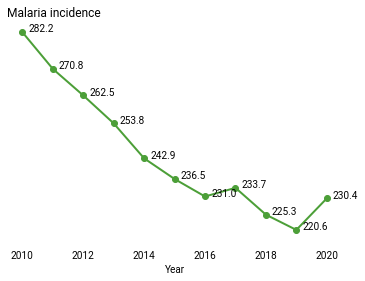

In [23]:
ax = G3_3_3_data.plot.line(linewidth = 2, color = [SDG_col[3]], marker = 'o'
                            )

ax.set_title('Malaria incidence', loc= 'left')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.get_yaxis().set_visible(False)
ax.tick_params(axis='x', which='major', length=0, pad = 10)

ax.xaxis.set_ticks(np.arange(2010, 2021, 2))

ax.get_legend().remove()

for key, value in G3_3_3_data.iterrows():
    ax.annotate('{:.1f}'.format(value['value']),(key+0.2,value['value']+0.2))


#### 3.4 Education
Proportion of teachers with the minimum required qualifications, by education level and sex (%) [SE_TRA_GRDL]

In [24]:
G4_c_1_data.head()

,value,Year,Sex,Education level,Reporting Type
25,69.56858,2010,Female,LOWSEC,G
174,69.92087,2010,All,PRIMAR,G
213,57.68091,2010,Male,SECOND,G
28,67.47610,2010,Male,PRIMAR,G
185,52.01634,2010,All,UPPSEC,G


In [25]:
G4_c_1_data_pop = G4_c_1_data[(G4_c_1_data['Education level'] != 'UPPSEC')&(G4_c_1_data['Education level'] != 'LOWSEC')]
G4_c_1_data_pop.head()

G4_c_1_data_all = G4_c_1_data_pop[G4_c_1_data_pop['Sex'] == 'All']
G4_c_1_data_all = G4_c_1_data_all.pivot(index = 'Year',columns = 'Education level', values = 'value')

In [26]:
G4_c_1_data_all

Education level,PREPRI,PRIMAR,SECOND
Year,,,
2010,49.30994,69.92087,59.98408
2011,45.73023,66.90280,53.20628
2012,42.37167,70.38081,59.11811
2013,40.46246,65.23207,54.93158
2014,51.97635,64.47091,56.22590
2015,53.44637,65.66009,56.95554
2016,54.19372,66.05912,61.29505
2017,56.36929,68.13600,61.98458
2018,56.03751,67.76939,62.60153


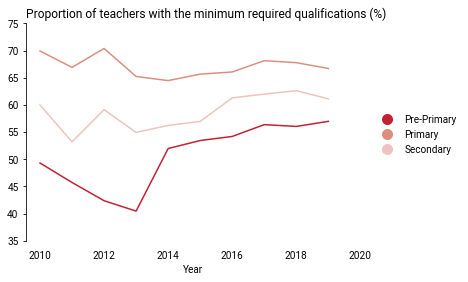

In [27]:
fig, ax = plt.subplots()

G4_c_1_data_all.plot.line(ax =ax, color = ['#c22033','#db8e7e','#ecc4bd'])

ax.set_title('Proportion of teachers with the minimum required qualifications (%)', loc = 'left')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.xaxis.set_ticks(np.arange(2010, 2021, 2))
ax.yaxis.set_ticks(np.arange(35, 76, 5))

ax.tick_params(axis='x', which='major', length=0, pad = 10)

legend_elements = [Line2D([0], [0], marker='o', markersize = 10,linewidth=0,  color='#c22033', label='Pre-Primary'),
                    Line2D([0], [0], marker='o', markersize = 10,linewidth=0,  color='#db8e7e', label='Primary'),
                    Line2D([0], [0], marker='o', markersize = 10,linewidth=0, color='#ecc4bd', label='Secondary')]

ax.legend(handles = legend_elements, bbox_to_anchor=[1.3, 0.6],
           ncol=1, borderaxespad=0.)

#### 3.5 Gender

##### 3.5.1 Proportion of women aged 20-24 years who were married or in a union before age 18 (%) [SP_DYN_MRBF18]

(-1.25, 1.25, -1.25, 1.25)

findfont: Font family ['roboto thick'] not found. Falling back to DejaVu Sans.
findfont: Font family ['roboto thick'] not found. Falling back to DejaVu Sans.


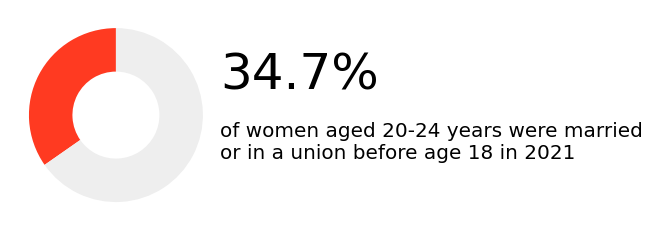

In [28]:
fig, ax = plt.subplots()

value = G5_3_1_data[G5_3_1_data['Year'] == 2021]['value'].item()
ax.pie( [value, 100 - value],
        wedgeprops=dict(width=.5), # donut
        startangle= 90,
        colors = [SDG_col[5],'#EEEEEE'])

ax.annotate('{:n}%'.format(value), (1.2,0.3), fontsize= 50,fontname = 'roboto thick')
ax.annotate('of women aged 20-24 years were married \nor in a union before age 18 in 2021', (1.2,-0.5), fontsize= 20,fontname = 'roboto thick')

ax.axis('on')

In [29]:
G5_3_1_data

,value,Year,Age,Sex,Reporting Type
2,38.3,2011,20-24,Female,G
3,36.3,2016,20-24,Female,G
4,34.7,2021,20-24,Female,G


##### 3.5.2 Proportion of women who make their own informed decisions regarding sexual relations, contraceptive use and reproductive health care (% of women aged 15-49 years) [SH_FPL_INFM]

In [30]:
G5_6_1_meta_data
G5_6_1_data.head()

,value,Year,Age,Sex,Reporting Type
0,47.3,2022,15-49,Female,G


(-1.25, 1.25, -1.25, 1.25)

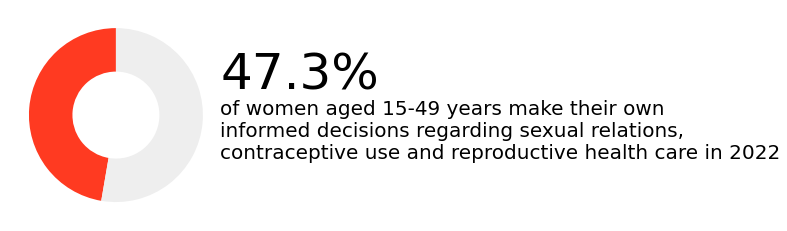

In [31]:
fig, ax = plt.subplots()

value = G5_6_1_data['value'].item()
ax.pie( [value, 100 - value],
        wedgeprops=dict(width=.5), # donut
        startangle= 90,
        colors = [SDG_col[5],'#EEEEEE'])

ax.annotate('{:.1f}%'.format(value), (1.2,0.3), fontsize= 50,fontname = 'roboto thick')
ax.annotate('of women aged 15-49 years make their own \ninformed decisions regarding sexual relations, \ncontraceptive use and reproductive health care in 2022', (1.2,-0.5), fontsize= 20,fontname = 'roboto thick')

ax.axis('on')

#### 3.7 Energy

In [32]:
G7_1_1_pivot = G7_1_1_data.pivot(index = 'Year',columns = 'Location', values = 'value')

In [33]:
G7_1_1_pivot

Location,ALLAREA,RURAL,URBAN
Year,,,
2010,33.12962,16.74940,68.21873
2011,35.73406,18.51714,72.27009
2012,36.63497,19.28876,72.33377
2013,37.74277,20.20840,72.47472
2014,38.03945,19.12878,72.33149
2015,38.77110,18.08098,72.12251
2016,43.55793,25.17801,74.82935
2017,43.46231,23.94885,76.26477
2018,46.13842,26.95989,75.62823


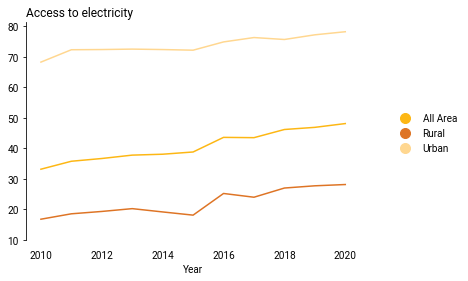

In [34]:
ax = G7_1_1_pivot.plot.line(color = ['#fdb714','#de7425','#ffd790'])
ax.xaxis.set_ticks(np.arange(2010, 2021, 5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.xaxis.set_ticks(np.arange(2010, 2021, 2))
ax.yaxis.set_ticks(np.arange(10, 81, 10))

ax.tick_params(axis='x', which='major', length=0, pad = 10)


ax.legend(bbox_to_anchor=(1.2,0.5))
ax.set_title('Access to electricity', loc = 'left')


legend_elements = [Line2D([0], [0], marker='o', markersize = 10,linewidth=0,  color= '#fdb714', label='All Area'),
                    Line2D([0], [0], marker='o', markersize = 10,linewidth=0,  color= '#de7425', label='Rural'),
                    Line2D([0], [0], marker='o', markersize = 10,linewidth=0, color= '#ffd790', label='Urban')]

ax.legend(handles = legend_elements, bbox_to_anchor=[1.3, 0.6],
           ncol=1, borderaxespad=0.)


#### 3.8 Decent Work and Economic growth
Proportion of children engaged in economic activity and household chores, by sex and age (%) [SL_TLF_CHLDEC]

In [35]:
G8_7_1_meta_data

{'series': 'SL_TLF_CHLDEC',
 'geoAreaCode': 202,
 'geoAreaName': 'Sub-Saharan Africa'}

In [36]:
G8_7_1_data

,value,Year,Age,Sex,Reporting Type
0,21.2,2020,5-17,Female,G
1,26.5,2020,5-17,Male,G
2,23.9,2020,5-17,All,G


In [37]:
for x in range(0,len(G8_7_1_data)):
    value = G8_7_1_data.loc[x,'value']
    print(value)

21.2
26.5
23.9


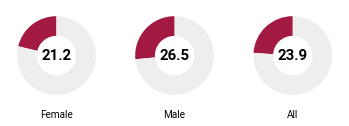

In [38]:
fig, ax = plt.subplots(ncols = 3)

for x in range(0,len(G8_7_1_data)):

    value = G8_7_1_data.loc[x,'value']
    sex = G8_7_1_data.loc[x, 'Sex']

    ax[x].pie( [value, 100 - value],
            wedgeprops=dict(width=.5), # donut
            startangle= 90,
            colors = [SDG_col[8],'#EEEEEE'])


    ax[x].annotate(value, (0,0),fontsize =15, fontweight = 'bold',horizontalalignment = 'center', verticalalignment = 'center')


    ax[x].axis('on')
    ax[x].set_xlabel(sex)


#### 3.9 Inudstry and Innovation
Proportion of medium and high-tech manufacturing value added in total value added (%) [NV_IND_TECH]


In [39]:
G9_b_1_meta_data

{'series': 'NV_IND_TECH',
 'geoAreaCode': 202,
 'geoAreaName': 'Sub-Saharan Africa'}

In [40]:
G9_b_1_data.set_index('Year',inplace = True)

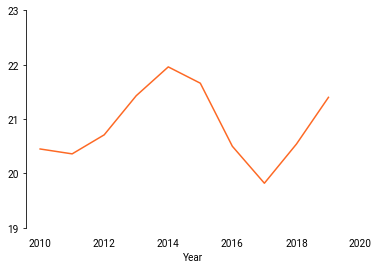

In [41]:
ax = G9_b_1_data.plot.line(color = SDG_col[9])

plt.xticks(np.arange(2010, 2021, 5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis='x', which='major', length=0, pad = 10)
ax.set_ylim(19,23)
ax.set_xticks(np.arange(2010,2021,2))
ax.set_yticks(np.arange(19,24,1))

ax.get_legend().remove()

### Visualisation

Text(0.08, 0.06, 'For The Sustainable Development Goals Report 2022, visit: \nhttps://unstats.un.org/sdgs/report/2022/')

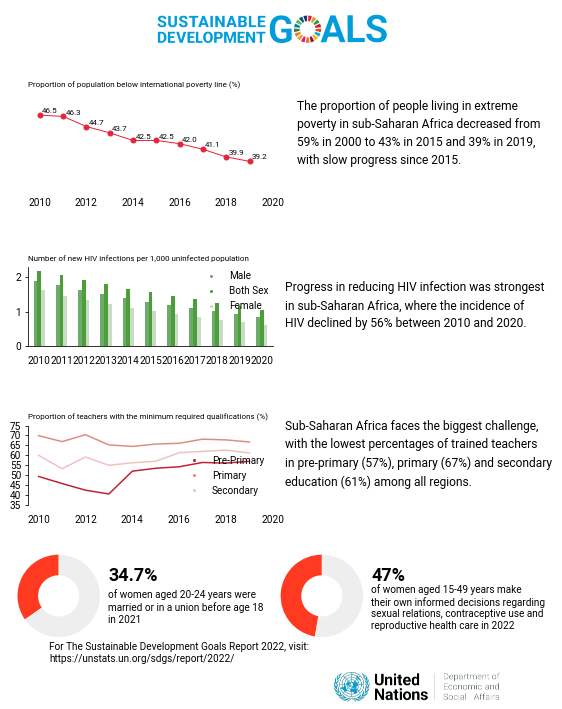

In [42]:
fig , ax = plt.subplots(figsize = (8.5,11))

ax.set_axis_off()
# branding logo
## UNDESA
im_UNDESA = plt.imread('/Users/Tra_FIT/Desktop/UN_DESA/Branding elements/UNDESA_black@600x-8.png')
dimensions = [  0.60, # left
                0, #bottom
                0.28, #width
                0.14  #height
                ]
newax = fig.add_axes(dimensions, zorder=1)
newax.imshow(im_UNDESA)
newax.axis('off')
## SDG Banner
im_SDG = plt.imread('/Users/Tra_FIT/Desktop/UN_DESA/Branding elements/SDG without emblem/E SDG logos + SDG wheel/E SDG Logo WEB/E SDG logo WEB/E_SDG_logo_horizontal_Transparent_WEB.png')
dimensions = [  0.3, # left
                0.8, #bottom
                0.4, #width
                0.2  #height
                ]
newax = fig.add_axes(dimensions, zorder=1)
newax.imshow(im_SDG)
newax.axis('off')

# ax_1 poverty plot
dimensions = [  0.1, # left
                0.7, #bottom
                0.4, #width
                0.12  #height
                ]
ax_1 = fig.add_axes(dimensions, zorder=1)
G1_data.plot.line(legend = False, marker = '.',markersize = 10, linewidth = 1, color = SDG_col[1], ax =ax_1)
##### set title                        
ax_1.set_title('Proportion of population below international poverty line (%)', loc='left', fontsize = 8)
ax_1.set_xlabel("")
##### turning off spine.spines['right'].set_visible(False)
ax_1.spines['top'].set_visible(False)
ax_1.spines['right'].set_visible(False)
ax_1.spines['bottom'].set_visible(False)
ax_1.spines['left'].set_visible(False)
ax_1.get_yaxis().set_visible(False)
##### setting axis limit
ax_1.set_ylim(35,50)
ax_1.set_xlim(2009.5,2020)
ax_1.tick_params(axis='x', which='major', length=0, pad = 10)
# data point
for key, value in G1_data.iterrows():
    ax_1.annotate(value['value'],(key+0.1,value['value']+0.3), fontsize = 8)

dimensions = [  0.5, # left
                0.7, #bottom
                0.4, #width
                0.12  #height
                ]
ax_1_annot = fig.add_axes(dimensions, zorder=1,facecolor = SDG_col[1])
text = "The proportion of people living in extreme \npoverty in sub-Saharan Africa decreased from \n59% in 2000 to 43% in 2015 and 39% in 2019, \nwith slow progress since 2015."
ax_1_annot.annotate(text,(0.1,0.25), fontsize = 12, linespacing = 1.5)
ax_1_annot.set_axis_off()



# ax_2_1 Health
dimensions = [  0.1, # left
                0.5, #bottom
                0.4, #width
                0.10  #height
                ]
ax_2_1 = fig.add_axes(dimensions, zorder=1)
G3_3_1_data_allage.plot.bar(linewidth = 2, color = ['#6dab6a',SDG_col[3],'#c9dbc4'], ax = ax_2_1
                            )
ax_2_1.spines['top'].set_visible(False)
ax_2_1.spines['right'].set_visible(False)
ax_2_1.tick_params(axis='x', which='major', length=0, pad = 10, rotation = 0)
legend_elements = [Line2D([0], [0], marker='o', markersize = 2,linewidth=0,  color='#6dab6a', label='Male'),
                    Line2D([0], [0], marker='o', markersize = 2,linewidth=0,  color=SDG_col[3], label='Both Sex'),
                    Line2D([0], [0], marker='o', markersize = 2,linewidth=0, color='#c9dbc4', label='Female')]

ax_2_1.legend(handles = legend_elements,loc = 'upper right', borderaxespad=0., edgecolor = '#FFFFFF',framealpha = 0)
#ax_2.set_yticklabels(np.arange(0,3,0.5))
ax_2_1.set_title('Number of new HIV infections per 1,000 uninfected population',loc = 'left', fontsize = 8)
ax_2_1.set_xlabel("")

dimensions = [  0.5, # left
                0.5, #bottom
                0.4, #width
                0.12  #height
                ]
ax_4_annot = fig.add_axes(dimensions, zorder=1)
text = 'Progress in reducing HIV infection was strongest \nin sub-Saharan Africa, where the incidence of \nHIV declined by 56% between 2010 and 2020.'
ax_4_annot.annotate(text, (0.05,0.2), fontsize = 12, linespacing = 1.5)
ax_4_annot.set_axis_off()



# ax_2_2
# ax_3 Education
#dimensions = [  0.05, # left
                #0.42, #bottom
                #0.4, #width
                #0.10  #height
                #]
#ax_3 = fig.add_axes(dimensions, zorder=1)

# ax_3 Education
dimensions = [  0.1, # left
                0.3, #bottom
                0.4, #width
                0.10  #height
                ]
ax_3 = fig.add_axes(dimensions, zorder=1)
G4_c_1_data_all.plot.line( color = ['#c22033','#db8e7e','#ecc4bd'], ax =ax_3)

ax_3.set_title('Proportion of teachers with the minimum required qualifications (%)', loc = 'left', fontsize = 8)
ax_3.set_xlabel("")

ax_3.spines['top'].set_visible(False)
ax_3.spines['right'].set_visible(False)
ax_3.spines['bottom'].set_visible(False)

ax_3.xaxis.set_ticks(np.arange(2010, 2021, 2))
ax_3.yaxis.set_ticks(np.arange(35, 76, 5))

ax_3.tick_params(axis='x', which='major', length=0, pad = 10)

legend_elements = [Line2D([0], [0], marker='o', markersize = 2,linewidth=0,  color='#c22033', label='Pre-Primary'),
                    Line2D([0], [0], marker='o', markersize = 2,linewidth=0,  color='#db8e7e', label='Primary'),
                    Line2D([0], [0], marker='o', markersize = 2,linewidth=0, color='#ecc4bd', label='Secondary')]

legend = ax_3.legend(handles = legend_elements, loc ='lower right', edgecolor = '#FFFFFF',framealpha = 0)
dimensions = [  0.5, # left
                0.3, #bottom
                0.4, #width
                0.12  #height
                ]
ax_4_annot = fig.add_axes(dimensions, zorder=1)
text = 'Sub-Saharan Africa faces the biggest challenge, \nwith the lowest percentages of trained teachers \nin pre-primary (57%), primary (67%) and secondary \neducation (61%) among all regions.'
ax_4_annot.annotate(text,(0.05,0.2), fontsize = 12, linespacing = 1.5)
ax_4_annot.set_axis_off()

# ax_4_1 Gender
dimensions = [  -0.05, # left
                0.12, #bottom
                0.4, #width
                0.13  #height
                ]
ax_4 = fig.add_axes(dimensions, zorder=1)

value = G5_3_1_data[G5_3_1_data['Year'] == 2021]['value'].item()
ax_4.pie( [value, 100 - value], wedgeprops=dict(width=.5), startangle= 90, colors = [SDG_col[5],'#EEEEEE'])

ax_4.annotate('{:n}%'.format(value), (1.2,0.36), fontsize= 18,fontname = 'roboto', fontweight= 'bold')
ax_4.annotate('of women aged 20-24 years were \nmarried or in a union before age 18 \nin 2021', (1.2,-0.65), fontsize= 10,fontname = 'roboto')

ax_4.axis('on')

# ax_4_2 Gender
dimensions = [  0.38, # left
                0.12, #bottom
                0.4, #width
                0.13  #height
                ]
ax_4_2 = fig.add_axes(dimensions, zorder=1)
value = G5_6_1_data['value'].item()
ax_4_2.pie( [value, 100 - value],
        wedgeprops=dict(width=.5), # donut
        startangle= 90,
        colors = [SDG_col[5],'#EEEEEE'])

ax_4_2.annotate('47%', (1.2,0.36), fontsize= 18,fontname = 'roboto', fontweight = 'bold')
ax_4_2.annotate('of women aged 15-49 years make \ntheir own informed decisions regarding \nsexual relations, contraceptive use and \nreproductive health care in 2022', (1.2,-0.8), fontsize= 10,fontname = 'roboto')

ax_4_2.axis('on')

ax.annotate('For The Sustainable Development Goals Report 2022, visit: \nhttps://unstats.un.org/sdgs/report/2022/',(0.08,0.06),xycoords = 'figure fraction', fontsize = 10)
# output

#### Heading Style

Text(0.08, 0.06, 'For detail SDG data, visit: \nhttps://unstats.un.org/sdgs/dataportal')

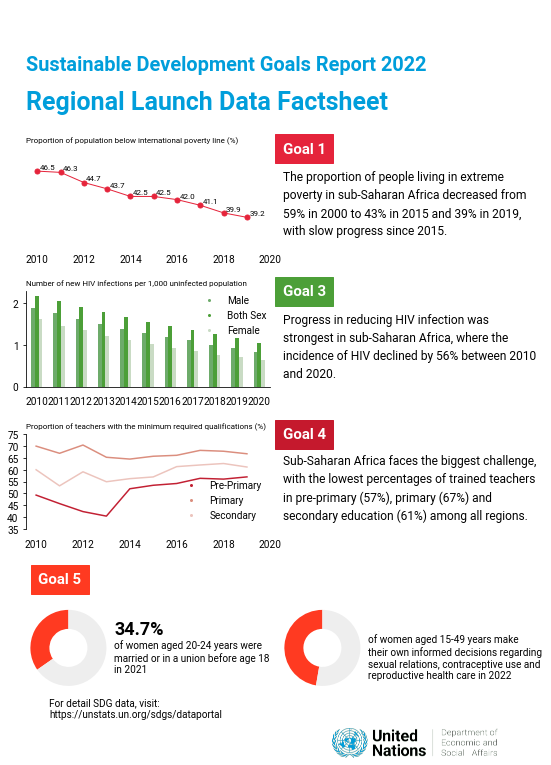

In [43]:
fig , ax = plt.subplots(figsize = (8.5,11))

ax.set_axis_off()


# branding logo
## UNDESA
im_UNDESA = plt.imread('/Users/Tra_FIT/Desktop/UN_DESA/Branding elements/UNDESA_black@600x-8.png')
dimensions = [  0.60, # left
                0, #bottom
                0.28, #width
                0.14  #height
                ]
newax = fig.add_axes(dimensions, zorder=1)
newax.imshow(im_UNDESA)
newax.axis('off')
## SDG Banner
dimensions = [  0.1, # left
                0.8, #bottom
                0.8, #width
                0.2  #height
                ]
newax = fig.add_axes(dimensions, zorder=1)
newax.annotate("Sustainable Development Goals Report 2022",(0,0.6),fontweight = 'heavy',fontsize = 20, color = SDG_col[0])
newax.annotate("Regional Launch Data Factsheet",(0,0.35),fontweight = 'heavy', fontsize = 25, color = SDG_col[0])
newax.axis('off')


# ax_1 poverty plot
dimensions = [  0.1, # left
                0.7, #bottom
                0.4, #width
                0.12  #height
                ]
ax_1 = fig.add_axes(dimensions, zorder=1)
G1_data.plot.line(legend = False, marker = '.',markersize = 10, linewidth = 1, color = SDG_col[1], ax =ax_1)
##### set title                        
ax_1.set_title('Proportion of population below international poverty line (%)', loc='left', fontsize = 8)
ax_1.set_xlabel("")
##### turning off spine.spines['right'].set_visible(False)
ax_1.spines['bottom'].set_visible(False)
ax_1.spines['left'].set_visible(False)
ax_1.get_yaxis().set_visible(False)
##### setting axis limit
ax_1.set_ylim(35,50)
ax_1.set_xlim(2009.5,2020)
#ax_1.tick_params(axis='x', which='major', length=0, pad = 10)
# data point
for key, value in G1_data.iterrows():
    ax_1.annotate(value['value'],(key+0.1,value['value']+0.3), fontsize = 8)
dimensions = [  0.5, # left
                0.7, #bottom
                0.4, #width
                0.12  #height
                ]
ax_1_annot = fig.add_axes(dimensions, zorder=1,facecolor = SDG_col[1])
text = "The proportion of people living in extreme \npoverty in sub-Saharan Africa decreased from \n59% in 2000 to 43% in 2015 and 39% in 2019, \nwith slow progress since 2015."
ax_1_annot.annotate(text,(0.05,0.1), xycoords = 'axes fraction',fontsize = 12, linespacing = 1.5)
ax_1_annot.text(0.05, 1, "Goal 1", ha="left", va="center", size=15, fontweight = 'heavy', color = '#FFFFFF',
                bbox=dict(boxstyle="square,pad=0.5", fc=SDG_col[1], ec = SDG_col[1]))
ax_1_annot.set_axis_off()




# ax_2_1 Health
dimensions = [  0.1, # left
                0.52, #bottom
                0.4, #width
                0.12  #height
                ]
ax_2_1 = fig.add_axes(dimensions, zorder=1)
G3_3_1_data_allage.plot.bar(linewidth = 2, color = ['#6dab6a',SDG_col[3],'#c9dbc4'], ax = ax_2_1
                            )
ax_2_1.tick_params(axis='x', which='major', length=0, pad = 10, rotation = 0)
legend_elements = [Line2D([0], [0], marker='o', markersize = 2,linewidth=0,  color='#6dab6a', label='Male'),
                    Line2D([0], [0], marker='o', markersize = 2,linewidth=0,  color=SDG_col[3], label='Both Sex'),
                    Line2D([0], [0], marker='o', markersize = 2,linewidth=0, color='#c9dbc4', label='Female')]
ax_2_1.legend(handles = legend_elements,loc = 'upper right', borderaxespad=0., edgecolor = '#FFFFFF')
#ax_2.set_yticklabels(np.arange(0,3,0.5))
ax_2_1.set_title('Number of new HIV infections per 1,000 uninfected population',loc = 'left', fontsize = 8)
ax_2_1.set_xlabel("")
dimensions = [  0.5, # left
                0.52, #bottom
                0.4, #width
                0.12  #height
                ]
ax_2_annot = fig.add_axes(dimensions, zorder=1)
text = 'Progress in reducing HIV infection was\nstrongest in sub-Saharan Africa, where the \nincidence of HIV declined by 56% between 2010 \nand 2020.'
ax_2_annot.annotate(text, (0.05,0.1), fontsize = 12, linespacing = 1.5)
ax_2_annot.text(0.05, 1, "Goal 3", ha="left", va="center", size=15, fontweight = 'heavy', color = '#FFFFFF',
                bbox=dict(boxstyle="square,pad=0.5", fc=SDG_col[3], ec = SDG_col[3]))
ax_2_annot.set_axis_off()



# ax_2_2
# ax_3 Education
#dimensions = [  0.05, # left
                #0.42, #bottom
                #0.4, #width
                #0.10  #height
                #]
#ax_3 = fig.add_axes(dimensions, zorder=1)

# ax_3 Education
dimensions = [  0.1, # left
                0.34, #bottom
                0.4, #width
                0.12  #height
                ]
ax_3 = fig.add_axes(dimensions, zorder=1)
G4_c_1_data_all.plot.line( color = ['#c22033','#db8e7e','#ecc4bd'], ax =ax_3)
# axis labels
ax_3.set_title('Proportion of teachers with the minimum required qualifications (%)', loc = 'left', fontsize = 8)
ax_3.set_xlabel("")
# spine
ax_3.spines['bottom'].set_visible(False)
# tick marks
ax_3.xaxis.set_ticks(np.arange(2010, 2021, 2))
ax_3.yaxis.set_ticks(np.arange(35, 76, 5))
# legned
legend_elements = [Line2D([0], [0], marker='o', markersize = 2,linewidth=0,  color='#c22033', label='Pre-Primary'),
                    Line2D([0], [0], marker='o', markersize = 2,linewidth=0,  color='#db8e7e', label='Primary'),
                    Line2D([0], [0], marker='o', markersize = 2,linewidth=0, color='#ecc4bd', label='Secondary')]
legend = ax_3.legend(handles = legend_elements, loc ='lower right', edgecolor = '#FFFFFF',framealpha = 0)
# annotation
dimensions = [  0.5, # left
                0.34, #bottom
                0.4, #width
                0.12  #height
                ]
ax_3_annot = fig.add_axes(dimensions, zorder=1)
text = 'Sub-Saharan Africa faces the biggest challenge, \nwith the lowest percentages of trained teachers \nin pre-primary (57%), primary (67%) and \nsecondary education (61%) among all regions.'
ax_3_annot.annotate(text,(0.05,0.1), xycoords = 'axes fraction', fontsize = 12, linespacing = 1.5)
ax_3_annot.text(0.05, 1, "Goal 4", ha="left", va="center", size=15, fontweight = 'heavy', color = '#FFFFFF',
                bbox=dict(boxstyle="square,pad=0.5", fc=SDG_col[4], ec = SDG_col[4]))
ax_3_annot.set_axis_off()




# ax_4_1 Gender
dimensions = [  -0.03, # left
                0.13, #bottom
                0.4, #width
                0.12  #height
                ]
ax_4 = fig.add_axes(dimensions, zorder=1)

value = G5_3_1_data[G5_3_1_data['Year'] == 2021]['value'].item()
ax_4.pie( [value, 100 - value], wedgeprops=dict(width=.5), startangle= 90, colors = [SDG_col[5],'#EEEEEE'])
ax_4.annotate('{:n}%'.format(value), (1.2,0.36), fontsize= 18,fontname = 'roboto', fontweight= 'bold')
ax_4.annotate('of women aged 20-24 years were \nmarried or in a union before age 18 \nin 2021', (1.2,-0.65), fontsize= 10,fontname = 'roboto')
ax_4.text(-0.8, 1.8, "Goal 5", ha="left", va="center", size=15, fontweight = 'heavy', color = '#FFFFFF',
                bbox=dict(boxstyle="square,pad=0.5", fc=SDG_col[5], ec = SDG_col[5]))
ax_4.axis('on')

# ax_4_2 Gender
dimensions = [  0.385, # left
                0.13, #bottom
                0.4, #width
                0.12  #height
                ]
ax_4_2 = fig.add_axes(dimensions, zorder=1)
value = G5_6_1_data['value'].item()
ax_4_2.pie( [value, 100 - value],
        wedgeprops=dict(width=.5), # donut
        startangle= 90,
        colors = [SDG_col[5],'#EEEEEE'])
ax_4_2.annotate('47%', (1.5,0.36), fontsize= 18,fontname = 'roboto', fontweight = 'bold')
ax_4_2.annotate('of women aged 15-49 years make \ntheir own informed decisions regarding \nsexual relations, contraceptive use and \nreproductive health care in 2022', (1.2,-0.8), fontsize= 10,fontname = 'roboto')
ax_4_2.axis('on')

# footnote
ax.annotate('For detail SDG data, visit: \nhttps://unstats.un.org/sdgs/dataportal',(0.08,0.06),xycoords = 'figure fraction', fontsize = 10)


#### Feedback p1

Text(0.08, 0.06, 'The Sustainable Development Goals Report 2022 \nhttps://unstats.un.org/sdgs/dataportal')

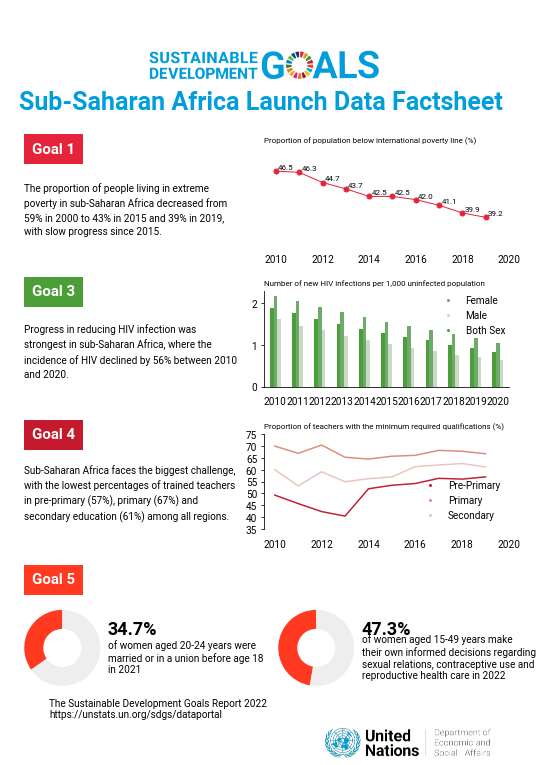

In [44]:
fig , ax = plt.subplots(figsize = (8.5,11))

ax.set_axis_off()


# branding logo
## UNDESA
im_UNDESA = plt.imread('/Users/Tra_FIT/Desktop/UN_DESA/Branding elements/UNDESA_black@600x-8.png')
dimensions = [  0.60, # left
                0, #bottom
                0.28, #width
                0.14  #height
                ]
newax = fig.add_axes(dimensions, zorder=1)
newax.imshow(im_UNDESA)
newax.axis('off')
## SDG Banner
im_SDG = plt.imread('/Users/Tra_FIT/Desktop/UN_DESA/Branding elements/SDG without emblem/E SDG logos + SDG wheel/E SDG Logo WEB/E SDG logo WEB/E_SDG_logo_horizontal_Transparent_WEB.png')
dimensions = [  0.3, # left
                0.85, #bottom
                0.4, #width
                0.15  #height
                ]
newax = fig.add_axes(dimensions, zorder=1)
newax.imshow(im_SDG)
newax.axis('off')
## title
dimensions = [  0.1, # left
                0.8, #bottom
                0.8, #width
                0.2  #height
                ]
newax = fig.add_axes(dimensions, zorder=1)
newax.annotate("Sub-Saharan Africa Launch Data Factsheet",(0,0.35),fontweight = 'heavy', fontsize = 25, color = SDG_col[0])
newax.axis('off')



# ax_1 poverty plot
dimensions = [  0.5, # left
                0.7, #bottom
                0.4, #width
                0.12  #height
                ]

ax_1 = fig.add_axes(dimensions, zorder=1)
G1_data.plot.line(legend = False, marker = '.',markersize = 10, linewidth = 1, color = SDG_col[1], ax =ax_1)
##### set title                        
ax_1.set_title('Proportion of population below international poverty line (%)', loc='left', fontsize = 8)
ax_1.set_xlabel("")
##### turning off spine.spines['right'].set_visible(False)
ax_1.spines['bottom'].set_visible(False)
ax_1.spines['left'].set_visible(False)
ax_1.get_yaxis().set_visible(False)
##### setting axis limit
ax_1.set_ylim(35,50)
ax_1.set_xlim(2009.5,2020)
#ax_1.tick_params(axis='x', which='major', length=0, pad = 10)
# data point
for key, value in G1_data.iterrows():
    ax_1.annotate(value['value'],(key+0.1,value['value']+0.3), fontsize = 8)
## word annotation
dimensions = [  0.1, # left
                0.7, #bottom
                0.4, #width
                0.12  #height
                ]
ax_1_annot = fig.add_axes(dimensions, zorder=1,facecolor = SDG_col[1])
text = "The proportion of people living in extreme \npoverty in sub-Saharan Africa decreased from \n59% in 2000 to 43% in 2015 and 39% in 2019, \nwith slow progress since 2015."
ax_1_annot.annotate(text,(0.02,0.1), xycoords = 'axes fraction',fontsize = 10, linespacing = 1.5)
### goal 1 box
ax_1_annot.text(0.05, 1, "Goal 1", ha="left", va="center", size=15, fontweight = 'heavy', color = '#FFFFFF',
                bbox=dict(boxstyle="square,pad=0.5", fc=SDG_col[1], ec = SDG_col[1]))
ax_1_annot.set_axis_off()




# ax_2_1 Health
dimensions = [  0.5, # left
                0.52, #bottom
                0.4, #width
                0.12  #height
                ]
ax_2_1 = fig.add_axes(dimensions, zorder=1)
G3_3_1_data_allage.plot.bar(linewidth = 2, color = [SDG_col[3],'#6dab6a','#c9dbc4'], ax = ax_2_1
                            )
ax_2_1.tick_params(axis='x', which='major', length=0, pad = 10, rotation = 0)
legend_elements = [Line2D([0], [0], marker='o', markersize = 2,linewidth=0,  color='#6dab6a', label='Female'),
                    Line2D([0], [0], marker='o', markersize = 2,linewidth=0, color='#c9dbc4', label='Male' ),
                    Line2D([0], [0], marker='o', markersize = 2,linewidth=0, color=SDG_col[3], label='Both Sex')]
ax_2_1.legend(handles = legend_elements,loc = 'upper right', borderaxespad=0., edgecolor = '#FFFFFF')
#ax_2.set_yticklabels(np.arange(0,3,0.5))
ax_2_1.set_title('Number of new HIV infections per 1,000 uninfected population',loc = 'left', fontsize = 8)
ax_2_1.set_xlabel("")
dimensions = [  0.1, # left
                0.52, #bottom
                0.4, #width
                0.12  #height
                ]
ax_2_annot = fig.add_axes(dimensions, zorder=1)
text = 'Progress in reducing HIV infection was\nstrongest in sub-Saharan Africa, where the \nincidence of HIV declined by 56% between 2010 \nand 2020.'
ax_2_annot.annotate(text, (0.02,0.1), fontsize = 10, linespacing = 1.5)
### goal 3 box
ax_2_annot.text(0.05, 1, "Goal 3", ha="left", va="center", size=15, fontweight = 'heavy', color = '#FFFFFF',
                bbox=dict(boxstyle="square,pad=0.5", fc=SDG_col[3], ec = SDG_col[3]))
ax_2_annot.set_axis_off()



# ax_2_2
# ax_3 Education
#dimensions = [  0.05, # left
                #0.42, #bottom
                #0.4, #width
                #0.10  #height
                #]
#ax_3 = fig.add_axes(dimensions, zorder=1)

# ax_3 Education
dimensions = [  0.5, # left
                0.34, #bottom
                0.4, #width
                0.12  #height
                ]
ax_3 = fig.add_axes(dimensions, zorder=1)
G4_c_1_data_all.plot.line( color = ['#c22033','#db8e7e','#ecc4bd'], ax =ax_3)
# axis labels
ax_3.set_title('Proportion of teachers with the minimum required qualifications (%)', loc = 'left', fontsize = 8)
ax_3.set_xlabel("")
# spine
ax_3.spines['bottom'].set_visible(False)
# tick marks
ax_3.xaxis.set_ticks(np.arange(2010, 2021, 2))
ax_3.yaxis.set_ticks(np.arange(35, 76, 5))
# legned
legend_elements = [Line2D([0], [0], marker='o', markersize = 2,linewidth=0,  color='#c22033', label='Pre-Primary'),
                    Line2D([0], [0], marker='o', markersize = 2,linewidth=0,  color='#db8e7e', label='Primary'),
                    Line2D([0], [0], marker='o', markersize = 2,linewidth=0, color='#ecc4bd', label='Secondary')]
legend = ax_3.legend(handles = legend_elements, loc ='lower right', edgecolor = '#FFFFFF',framealpha = 0)
# annotation
dimensions = [  0.1, # left
                0.34, #bottom
                0.4, #width
                0.12  #height
                ]
ax_3_annot = fig.add_axes(dimensions, zorder=1)
text = 'Sub-Saharan Africa faces the biggest challenge, \nwith the lowest percentages of trained teachers \nin pre-primary (57%), primary (67%) and \nsecondary education (61%) among all regions.'
ax_3_annot.annotate(text,(0.02,0.1), xycoords = 'axes fraction', fontsize = 10, linespacing = 1.5)
### goal4 box
ax_3_annot.text(0.05, 1, "Goal 4", ha="left", va="center", size=15, fontweight = 'heavy', color = '#FFFFFF',
                bbox=dict(boxstyle="square,pad=0.5", fc=SDG_col[4], ec = SDG_col[4]))
ax_3_annot.set_axis_off()




# ax_4_1 Gender
dimensions = [  -0.03, # left
                0.13, #bottom
                0.4, #width
                0.12  #height
                ]
ax_4 = fig.add_axes(dimensions, zorder=1)

value = G5_3_1_data[G5_3_1_data['Year'] == 2021]['value'].item()
ax_4.pie( [value, 100 - value], wedgeprops=dict(width=.5), startangle= 90, colors = [SDG_col[5],'#EEEEEE'])
ax_4.annotate('{:.1f}%'.format(value), (1.2,0.36), fontsize= 18,fontname = 'roboto', fontweight= 'bold')
ax_4.annotate('of women aged 20-24 years were \nmarried or in a union before age 18 \nin 2021', (1.2,-0.65), fontsize= 10,fontname = 'roboto')
### goal5 box
ax_4.text(-0.8, 1.8, "Goal 5", ha="left", va="center", size=15, fontweight = 'heavy', color = '#FFFFFF',
                bbox=dict(boxstyle="square,pad=0.5", fc=SDG_col[5], ec = SDG_col[5]))
ax_4.axis('on')

# ax_4_2 Gender
dimensions = [  0.385, # left
                0.13, #bottom
                0.4, #width
                0.12  #height
                ]
ax_4_2 = fig.add_axes(dimensions, zorder=1)
value = G5_6_1_data['value'].item()
ax_4_2.pie( [value, 100 - value],
        wedgeprops=dict(width=.5), # donut
        startangle= 90,
        colors = [SDG_col[5],'#EEEEEE'])
ax_4_2.annotate('{:.1f}%'.format(value), (1.2,0.36), fontsize= 18,fontname = 'roboto', fontweight = 'bold')
ax_4_2.annotate('of women aged 15-49 years make \ntheir own informed decisions regarding \nsexual relations, contraceptive use and \nreproductive health care in 2022', (1.2,-0.8), fontsize= 10,fontname = 'roboto')
ax_4_2.axis('on')

# footnote
ax.annotate('The Sustainable Development Goals Report 2022 \nhttps://unstats.un.org/sdgs/dataportal',(0.08,0.06),xycoords = 'figure fraction', fontsize = 10)


### Final Visualisation

#### Page 1

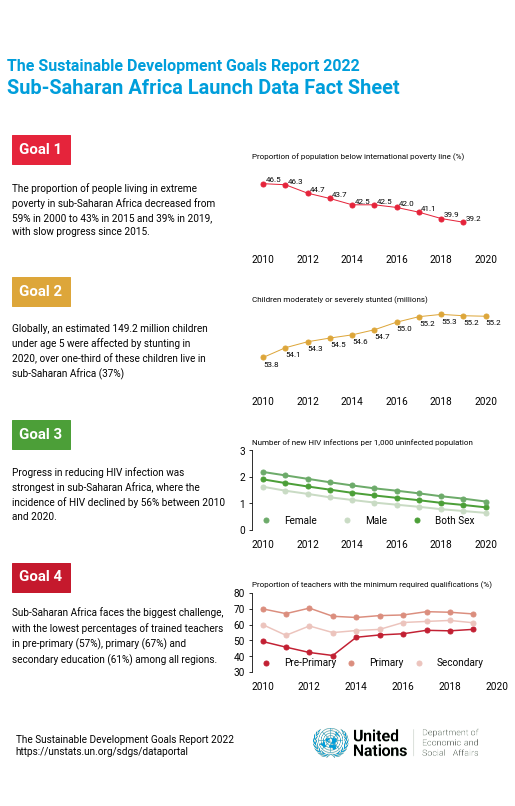

In [45]:
fig , ax = plt.subplots(figsize = (8.5,11))

ax.set_axis_off()


# branding logo
## UNDESA
im_UNDESA = plt.imread('/Users/Tra_FIT/Desktop/UN_DESA/Branding elements/UNDESA_black@600x-8.png')
dimensions = [  0.60, # left
                0, #bottom
                0.28, #width
                0.14  #height
                ]
newax = fig.add_axes(dimensions, zorder=1)
newax.imshow(im_UNDESA)
newax.axis('off')

# footnote
dimensions = [  0.10, # left
                0, #bottom
                0.28, #width
                0.14  #height
                ]
newax = fig.add_axes(dimensions, zorder=1)
newax.annotate('The Sustainable Development Goals Report 2022 \nhttps://unstats.un.org/sdgs/dataportal',(0.05,0.4), fontsize = 10)
newax.axis('off')
## title
dimensions = [  0.1, # left
                0.8, #bottom
                0.8, #width
                0.2  #height
                ]
newax = fig.add_axes(dimensions, zorder=1)
newax.annotate("The Sustainable Development Goals Report 2022",(0,0.6),fontweight = 'heavy',fontsize = 16, color = SDG_col[0])
newax.annotate("Sub-Saharan Africa Launch Data Fact Sheet",(0,0.45),fontweight = 'heavy', fontsize = 20, color = SDG_col[0])
newax.axis('off')



# ax_1 poverty plot
dimensions = [  0.5, # left
                0.7, #bottom
                0.4, #width
                0.10  #height
                ]
ax_1 = fig.add_axes(dimensions, zorder=1)
G1_data.plot.line(legend = False, marker = '.',markersize = 10, linewidth = 1, color = SDG_col[1], ax =ax_1)
##### set title                        
ax_1.set_title('Proportion of population below international poverty line (%)', loc='left', fontsize = 8)
ax_1.set_xlabel("")
##### turning off spine.spines['right'].set_visible(False)
ax_1.spines['bottom'].set_visible(False)
ax_1.spines['left'].set_visible(False)
ax_1.get_yaxis().set_visible(False)
##### setting axis limit
ax_1.set_ylim(35,50)
ax_1.set_xlim(2009.5,2020.5)
#ax_1.tick_params(axis='x', which='major', length=0, pad = 10)
# data point
for key, value in G1_data.iterrows():
    ax_1.annotate(value['value'],(key+0.1,value['value']+0.3), fontsize = 8)
## word annotation
dimensions = [  0.1, # left
                0.7, #bottom
                0.4, #width
                0.12  #height
                ]
ax_1_annot = fig.add_axes(dimensions, zorder=1,facecolor = SDG_col[1])
text = "The proportion of people living in extreme \npoverty in sub-Saharan Africa decreased from \n59% in 2000 to 43% in 2015 and 39% in 2019, \nwith slow progress since 2015."
ax_1_annot.annotate(text,(0.02,0.1), xycoords = 'axes fraction',fontsize = 10, linespacing = 1.5)
### goal 1 box
ax_1_annot.text(0.05, 1, "Goal 1", ha="left", va="center", size=15, fontweight = 'heavy', color = '#FFFFFF',
                bbox=dict(boxstyle="square,pad=0.5", fc=SDG_col[1], ec = SDG_col[1]))
ax_1_annot.set_axis_off()




# ax_2 Hunger
dimensions = [  0.5, # left
                0.52, #bottom
                0.4, #width
                0.10  #height
                ]
ax_2 = fig.add_axes(dimensions, zorder=1)
G2_data.plot.line(legend = False,  marker = '.',markersize = 10, linewidth = 1, color = SDG_col[2], ax = ax_2)
# turning off spine.spines['right'].set_visible(False)
ax_2.spines['top'].set_visible(False)
ax_2.spines['right'].set_visible(False)
ax_2.spines['bottom'].set_visible(False)
ax_2.spines['left'].set_visible(False)
ax_2.get_yaxis().set_visible(False)
# setting axis limit
ax_2.set_xlim(2009.5,2020.5)
ax_2.set_xlabel('')
ax_2.set_ylim(52800,55500)
ax_2.set_title('Children moderately or severely stunted (millions)',loc = 'left', fontsize = 8)
### annotation
for key, value in G2_data.iterrows():
    ax_2.annotate('{:.1f}'.format(value['value']/1000),(key,value['value']-300),fontsize = 8)
dimensions = [  0.1, # left
                0.52, #bottom
                0.4, #width
                0.12  #height
                ]
ax_2_annot = fig.add_axes(dimensions, zorder=1)
text = 'Globally, an estimated 149.2 million children \nunder age 5 were affected by stunting in \n2020, over one-third of these children live in \nsub-Saharan Africa (37%)'
ax_2_annot.annotate(text, (0.02,0.1), fontsize = 10, linespacing = 1.5)
### goal 2 box
ax_2_annot.text(0.05, 1, "Goal 2", ha="left", va="center", size=15, fontweight = 'heavy', color = '#FFFFFF',
                bbox=dict(boxstyle="square,pad=0.5", fc=SDG_col[2], ec = SDG_col[2]))
ax_2_annot.set_axis_off()



# ax_3 Health
dimensions = [  0.5, # left
                0.34, #bottom
                0.4, #width
                0.10  #height
                ]
ax_3 = fig.add_axes(dimensions, zorder=1)
G3_3_1_data_allage.plot.line(linewidth = 2,marker = '.',markersize = 10, color = [SDG_col[3],'#6dab6a','#c9dbc4'], ax = ax_3
                            )
ax_3.tick_params(axis='x', which='major', length=0, pad = 10, rotation = 0)
legend_elements = [Line2D([0], [0], marker='o', markersize = 5,linewidth=0,  color='#6dab6a', label='Female'),
                    Line2D([0], [0], marker='o', markersize = 5,linewidth=0,  color='#c9dbc4', label='Male'),
                    Line2D([0], [0], marker='o', markersize = 5,linewidth=0, color=SDG_col[3], label='Both Sex')]
ax_3.legend(handles = legend_elements,loc = 'lower left', borderaxespad=0., edgecolor = '#FFFFFF',bbox_to_anchor=[0,0],ncol=3)
#ax_2.set_yticklabels(np.arange(0,3,0.5))
ax_3.set_title('Number of new HIV infections per 1,000 uninfected population',loc = 'left', fontsize = 8)
ax_3.set_xlabel("")
ax_3.set_xlim(2009.5,2020.5)
ax_3.set_xticks(np.arange(2010,2021,2))
ax_3.set_ylim(0,3)
ax_3.spines['bottom'].set_visible(False)
dimensions = [  0.1, # left
                0.34, #bottom
                0.4, #width
                0.12  #height
                ]
ax_3_annot = fig.add_axes(dimensions, zorder=1)
text = 'Progress in reducing HIV infection was\nstrongest in sub-Saharan Africa, where the \nincidence of HIV declined by 56% between 2010 \nand 2020.'
ax_3_annot.annotate(text, (0.02,0.1), fontsize = 10, linespacing = 1.5)
### goal 3 box
ax_3_annot.text(0.05, 1, "Goal 3", ha="left", va="center", size=15, fontweight = 'heavy', color = '#FFFFFF',
                bbox=dict(boxstyle="square,pad=0.5", fc=SDG_col[3], ec = SDG_col[3]))
ax_3_annot.set_axis_off()



# ax_4 Education
dimensions = [  0.5, # left
                0.16, #bottom
                0.4, #width
                0.10  #height
                ]
ax_4 = fig.add_axes(dimensions, zorder=1)
G4_c_1_data_all.plot.line( marker = '.',markersize = 10,color = ['#c22033','#db8e7e','#ecc4bd'], ax =ax_4)
# axis labels
ax_4.set_title('Proportion of teachers with the minimum required qualifications (%)', loc = 'left', fontsize = 8)
ax_4.set_xlabel("")
# spine
ax_4.spines['bottom'].set_visible(False)
# tick marks
ax_4.xaxis.set_ticks(np.arange(2010, 2021, 2))
ax_4.yaxis.set_ticks(np.arange(30, 81, 10))
# legned
legend_elements = [Line2D([0], [0], marker='o', markersize = 5,linewidth=0,  color='#c22033', label='Pre-Primary'),
                    Line2D([0], [0], marker='o', markersize = 5,linewidth=0,  color='#db8e7e', label='Primary'),
                    Line2D([0], [0], marker='o', markersize = 5,linewidth=0, color='#ecc4bd', label='Secondary')]
legend = ax_4.legend(handles = legend_elements, loc ='lower left', edgecolor = '#FFFFFF',framealpha = 0,bbox_to_anchor=[0,0],ncol=3, borderaxespad=0,columnspacing =.5)
# annotation
dimensions = [  0.1, # left
                0.16, #bottom
                0.4, #width
                0.12  #height
                ]
ax_4_annot = fig.add_axes(dimensions, zorder=1)
text = 'Sub-Saharan Africa faces the biggest challenge, \nwith the lowest percentages of trained teachers \nin pre-primary (57%), primary (67%) and \nsecondary education (61%) among all regions.'
ax_4_annot.annotate(text,(0.02,0.1), xycoords = 'axes fraction', fontsize = 10, linespacing = 1.5)
### goal4 box
ax_4_annot.text(0.05, 1, "Goal 4", ha="left", va="center", size=15, fontweight = 'heavy', color = '#FFFFFF',
                bbox=dict(boxstyle="square,pad=0.5", fc=SDG_col[4], ec = SDG_col[4]))
ax_4_annot.set_axis_off()



# output
plt.savefig('{}SDG_launch_afr_p1_01.pdf'.format(file_dir), dpi= 300)

#### Page 2

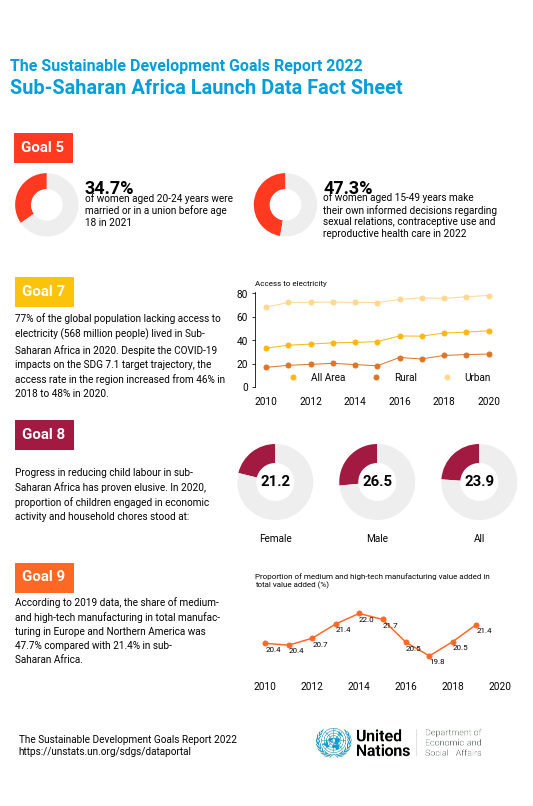

In [46]:
fig , ax = plt.subplots(figsize = (8.5,11))

ax.set_axis_off()


# branding logo
## UNDESA
im_UNDESA = plt.imread('/Users/Tra_FIT/Desktop/UN_DESA/Branding elements/UNDESA_black@600x-8.png')
dimensions = [  0.60, # left
                0, #bottom
                0.28, #width
                0.14  #height
                ]
newax = fig.add_axes(dimensions, zorder=1)
newax.imshow(im_UNDESA)
newax.axis('off')


# footnote
dimensions = [  0.10, # left
                0, #bottom
                0.28, #width
                0.14  #height
                ]
newax = fig.add_axes(dimensions, zorder=1)
newax.annotate('The Sustainable Development Goals Report 2022 \nhttps://unstats.un.org/sdgs/dataportal',(0.05,0.4), fontsize = 10)
newax.axis('off')

## title
dimensions = [  0.1, # left
                0.8, #bottom
                0.8, #width
                0.2  #height
                ]
newax = fig.add_axes(dimensions, zorder=1)
newax.annotate("The Sustainable Development Goals Report 2022",(0,0.6),fontweight = 'heavy',fontsize = 16, color = SDG_col[0])
newax.annotate("Sub-Saharan Africa Launch Data Fact Sheet",(0,0.45),fontweight = 'heavy', fontsize = 20, color = SDG_col[0])
newax.axis('off')


# ax_5_1 Gender
dimensions = [  -0.04, # left
                0.7, #bottom
                0.4, #width
                0.10  #height
                ]
ax_5_1 = fig.add_axes(dimensions, zorder=1)

value = G5_3_1_data[G5_3_1_data['Year'] == 2021]['value'].item()
ax_5_1.pie( [value, 100 - value], wedgeprops=dict(width=.5), startangle= 90, colors = [SDG_col[5],'#EEEEEE'])

ax_5_1.annotate('{:n}%'.format(value), (1.2,0.36), fontsize= 18,fontname = 'roboto', fontweight= 'bold')
ax_5_1.annotate('of women aged 20-24 years were \nmarried or in a union before age \n18 in 2021', (1.2,-0.65), fontsize= 10,fontname = 'roboto')
ax_5_1.axis('on')
# ax_5_2 Gender
dimensions = [  0.35, # left
                0.7, #bottom
                0.4, #width
                0.10  #height
                ]
ax_5_2 = fig.add_axes(dimensions, zorder=1)
value = G5_6_1_data['value'].item()
ax_5_2.pie( [value, 100 - value],
        wedgeprops=dict(width=.5), # donut
        startangle= 90,
        colors = [SDG_col[5],'#EEEEEE'])
ax_5_2.annotate('{:n}%'.format(value), (1.2,0.36), fontsize= 18,fontname = 'roboto', fontweight = 'bold')
ax_5_2.annotate('of women aged 15-49 years make \ntheir own informed decisions regarding \nsexual relations, contraceptive use and \nreproductive health care in 2022', (1.2,-1), fontsize= 10,fontname = 'roboto')
ax_5_2.axis('on')
### goal 5 box
ax_5_1.text(-0.8, 1.8, "Goal 5", ha="left", va="center", size=15, fontweight = 'heavy', color = '#FFFFFF',
                bbox=dict(boxstyle="square,pad=0.5", fc=SDG_col[5], ec = SDG_col[5]))



# ax_7 energy
dimensions = [  0.5, # left
                0.52, #bottom
                0.4, #width
                0.12  #height
                ]
ax_7 = fig.add_axes(dimensions, zorder=1)
G7_1_1_pivot.plot.line(legend = False, marker = '.',markersize = 10, linewidth = 1, color = ['#fdb714','#de7425','#ffd790'], ax =ax_7)
### ax_7 axis object
ax_7.xaxis.set_ticks(np.arange(2010, 2021, 5))
ax_7.spines['top'].set_visible(False)
ax_7.spines['right'].set_visible(False)
ax_7.spines['bottom'].set_visible(False)
ax_7.xaxis.set_ticks(np.arange(2010, 2021, 2))
ax_7.yaxis.set_ticks(np.arange(0, 81, 20))
ax_7.tick_params(axis='x', which='major', length=0, pad = 10)
ax_7.set_title('Access to electricity', loc = 'left', fontsize = 8)
ax_7.set_xlabel('')
### ax_7 legend
#ax_7.legend(bbox_to_anchor=(1.2,0.5))
legend_elements = [Line2D([0], [0], marker='o', markersize = 5,linewidth=0,  color= '#fdb714', label='All Area'),
                    Line2D([0], [0], marker='o', markersize = 5,linewidth=0,  color= '#de7425', label='Rural'),
                    Line2D([0], [0], marker='o', markersize = 5,linewidth=0, color= '#ffd790', label='Urban')]
ax_7.legend(handles = legend_elements, loc = 'lower left',bbox_to_anchor=[0.1,0],
           ncol=3, borderaxespad=0)
### word annotation
dimensions = [  0.1, # left
                0.52, #bottom
                0.4, #width
                0.12  #height
                ]
ax_7_annot = fig.add_axes(dimensions, zorder=1,facecolor = SDG_col[1])
text = "77% of the global population lacking access to \nelectricity (568 million people) lived in Sub-\nSaharan Africa in 2020. Despite the COVID-19 \nimpacts on the SDG 7.1 target trajectory, the \naccess rate in the region increased from 46% in \n2018 to 48% in 2020. "
ax_7_annot.annotate(text,(0.02,-0.1), xycoords = 'axes fraction',fontsize = 10, linespacing = 1.5)
### goal 7 box
ax_7_annot.text(0.05, 1, "Goal 7", ha="left", va="center", size=15, fontweight = 'heavy', color = '#FFFFFF',
                bbox=dict(boxstyle="square,pad=0.5", fc=SDG_col[7], ec = SDG_col[7]))
ax_7_annot.set_axis_off()




# ax_8 Decent Work 
for x in range(0,len(G8_7_1_data)):
        value = G8_7_1_data.loc[x,'value']
        sex = G8_7_1_data.loc[x, 'Sex']
        dimensions = [  0.45+x*(0.5/3), # left
                        0.34, #bottom
                        (0.5/3), #width
                        0.12  #height
                ]
        ax = fig.add_axes(dimensions, zorder=1)
        ax.pie( [value, 100 - value],
                wedgeprops=dict(width=.5), # donut
                startangle= 90,
                colors = [SDG_col[8],'#EEEEEE'])
        ax.annotate(value, (0,0),fontsize =15, fontweight = 'bold',horizontalalignment = 'center', verticalalignment = 'center')
        ax.axis('on')
        ax.set_xlabel(sex)
# annotation
dimensions = [  0.1, # left
                0.34, #bottom
                0.4, #width
                0.12  #height
                ]
ax_8_annot = fig.add_axes(dimensions, zorder=1)
text = 'Progress in reducing child labour in sub-\nSaharan Africa has proven elusive. In 2020, \nproportion of children engaged in economic \nactivity and household chores stood at:'
                                                                        
ax_8_annot.annotate(text,(0.02,0.1), xycoords = 'axes fraction', fontsize = 10, linespacing = 1.5)
### goal8 box
ax_8_annot.text(0.05, 1, "Goal 8", ha="left", va="center", size=15, fontweight = 'heavy', color = '#FFFFFF',
                bbox=dict(boxstyle="square,pad=0.5", fc=SDG_col[8], ec = SDG_col[8]))
ax_8_annot.set_axis_off()





# ax_9 Industry and innovation
dimensions = [  0.5, # left
                0.16, #bottom
                0.4, #width
                0.10  #height
                ]
ax_9 = fig.add_axes(dimensions, zorder=1)
G9_b_1_data.plot.line(color = SDG_col[9],marker = '.',markersize = 10,  ax = ax_9)
#plt.xticks(np.arange(2010, 2021, 5))
ax_9.spines['top'].set_visible(False)
ax_9.spines['right'].set_visible(False)
ax_9.spines['bottom'].set_visible(False)
ax_9.spines['left'].set_visible(False)
ax_9.get_yaxis().set_visible(False)
ax_9.tick_params(axis='x', which='major', length=0, pad = 10)
ax_9.set_ylim(19,23)
ax_9.set_xticks(np.arange(2010,2021,2))
ax_9.set_xlabel('')
ax_9.get_legend().remove()
ax_9.set_title('Proportion of medium and high-tech manufacturing value added in \ntotal value added (%)', loc = 'left',fontsize = 8)
for key, value in G9_b_1_data.iterrows():
    ax_9.annotate('{:.1f}'.format(value['value']),(key,value['value']-0.4),fontsize = 8)
# annotation
dimensions = [  0.1, # left
                0.16, #bottom
                0.4, #width
                0.12  #height
                ]
ax_9_annot = fig.add_axes(dimensions, zorder=1)
text = 'According to 2019 data, the share of medium- \nand high-tech manufacturing in total manufac-\nturing in Europe and Northern America was \n47.7% compared with 21.4% in sub-\nSaharan Africa.'
ax_9_annot.annotate(text,(0.02,0.1), xycoords = 'axes fraction', fontsize = 10, linespacing = 1.5)
### goal9 box
ax_9_annot.text(0.05, 1, "Goal 9", ha="left", va="center", size=15, fontweight = 'heavy', color = '#FFFFFF',
                bbox=dict(boxstyle="square,pad=0.5", fc=SDG_col[9], ec = SDG_col[9]))
ax_9_annot.set_axis_off()


# output
plt.savefig('{}SDG_launch_afr_p2_01.pdf'.format(file_dir), dpi= 300)